In [21]:
import eleanor
import numpy as np
from lightkurve.lightcurve import LightCurve as LC
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.timeseries import LombScargle as lombscargle

In [2]:
ra = "06:14:01.1692865337"
dec = "-61:28:23.525528737"

coords = SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

In [3]:
star = eleanor.Source(coords=coords, sector=5, tc=True)

Inflating...


In [4]:
data = eleanor.TargetData(star, do_psf=True)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
  0%|          | 0/1196 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
100%|██████████| 1196/1196 [00:32<00:00, 36.63it/s]


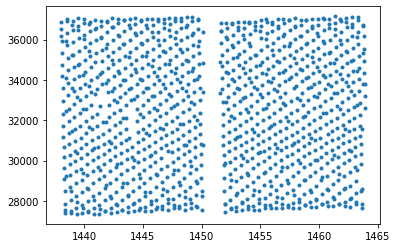

In [11]:
q = data.quality == 0

plt.plot(data.time[q], data.psf_flux[q], '.')
#plt.ylim(30000,55000);

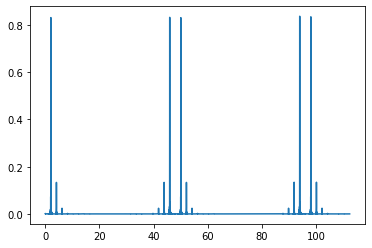

In [22]:
f, p = lombscargle(t=data.time[q], y=data.psf_flux[q]).autopower()
arg = np.argmax(p)
plt.plot(f, p);

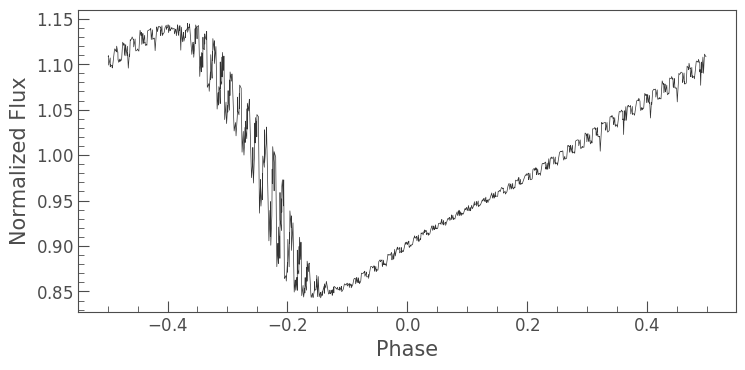

In [25]:
LC(time=data.time[q], flux=data.psf_flux[q]).fold(period=1/f[arg]).plot()